In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('churn.csv')

In [90]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.shape

(7043, 21)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**<b> 2.Cleaning The Data</b>**

In [93]:
df.loc[:,['Partner','Dependents','PhoneService','OnlineSecurity','OnlineSecurity',\
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,No,No,No,No,No,Yes,No
1,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [94]:
var = ['Partner','Dependents','PhoneService','OnlineSecurity','OnlineSecurity',\
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for feature in var:
    df[feature] = df[feature].apply(lambda x :1 if x=='Yes' else 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,0,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,0,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [95]:
df.loc[:,['Partner','Dependents','PhoneService','OnlineSecurity','OnlineSecurity',\
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,0,1,1,1,1,1,0
7039,1,1,1,0,0,1,0,1,1,1,0
7040,1,1,0,0,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [97]:
df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]


,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


In [98]:
df.select_dtypes(include=['object'])


,customerID,gender,MultipleLines,InternetService,OnlineBackup,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Yes,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,No,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Yes,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,No,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,No,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,No,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,Yes,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,No,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,No,Month-to-month,Mailed check,306.6


In [99]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df.info()

ValueError: could not convert string to float: ''

In [100]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
916.75      1
5174.35     1
59.75       1
184.05      1
5614.45     1
Name: TotalCharges, Length: 6531, dtype: int64

In [101]:
df.loc[df.TotalCharges == '', :]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [102]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [104]:
df = df.drop('customerID',axis = 1)

In [105]:
df.shape

(7043, 20)

In [106]:
df_categorical = df.select_dtypes(include = ['object'])
df_categorical.head()

,gender,MultipleLines,InternetService,OnlineBackup,Contract,PaymentMethod
0,Female,No phone service,DSL,Yes,Month-to-month,Electronic check
1,Male,No,DSL,No,One year,Mailed check
2,Male,No,DSL,Yes,Month-to-month,Mailed check
3,Male,No phone service,DSL,No,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,No,Month-to-month,Electronic check


In [107]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse = False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical),
                                                 columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()



,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
df = pd.concat([df, df_encoded], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,Yes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,0,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,0,Yes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,0,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,No,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   object 
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [110]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [111]:
df = df.drop(df_categorical.columns,axis=1)

In [112]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   DeviceProtection                       7043 non-null   int64  
 7   TechSupport                            7043 non-null   int64  
 8   StreamingTV                            7043 non-null   int64  
 9   StreamingMovies                        7043 non-null   int64  
 10  PaperlessBilling                       7043 non-null   int64  
 11  Mont

In [114]:
df.columns


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [115]:
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [116]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


In [117]:
df.isnull().sum()


SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
Contract_One year                         0
Contract_Two year               

In [118]:
df = df[~np.isnan(df['TotalCharges'])]


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   DeviceProtection                       7032 non-null   int64  
 7   TechSupport                            7032 non-null   int64  
 8   StreamingTV                            7032 non-null   int64  
 9   StreamingMovies                        7032 non-null   int64  
 10  PaperlessBilling                       7032 non-null   int64  
 11  Mont

In [120]:
sum(df['Churn'])/len(df['Churn'].index)*100


26.578498293515356

In [121]:
df['Churn'].value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [122]:
class_count_0, class_count_1 = df['Churn'].value_counts()
# Separate class
df=df.sample(frac=1)
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]
# print the shape of the class
print('df_class 0:', df_class_0.shape)
print('df_class 1:', df_class_1.shape)

df_class 0: (5163, 26)
df_class 1: (1869, 26)


In [123]:
#class_0 = df_class_0.sample(class_count_1)
under_sampling = pd.concat([class_0, df_class_1])
new_df = under_sampling.sample(frac=1, random_state=0)
new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7021,0,0,0,12,1,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1738,0,1,0,66,1,0,1,1,0,0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4713,0,1,1,58,1,0,1,1,1,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3501,0,1,1,59,1,0,1,1,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
160,0,0,1,13,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


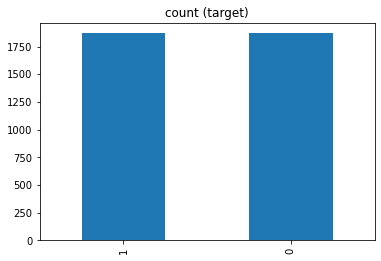

In [124]:
new_df['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [125]:
X = new_df.drop("Churn",axis = 1)
y= new_df['Churn']

In [126]:
X.shape

(3738, 25)

In [127]:
y.shape

(3738,)

In [128]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(3738, 25)


In [129]:
#target = test_under[['Churn']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data,y,test_size = 0.20,random_state = 0)

In [149]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2990, 25)
(2990,)
(748, 25)
(748,)


In [158]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint 

In [159]:
tuned_parameters = [{'C':[1,10,100], 'penalty':['l1','l2','l3']}]
evaluation_metrics = ['accuracy','precision','recall']                    
for i in evaluation_metrics:                   
    clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))

Best parameters set found on train set:
for accuracy
{'penalty': 'l2', 'C': 100}
LogisticRegression(C=100)
0.733957219251337
Best parameters set found on train set:
for precision
{'penalty': 'l2', 'C': 1}
LogisticRegression(C=1)
0.6873508353221957
Best parameters set found on train set:
for recall
{'penalty': 'l2', 'C': 100}
LogisticRegression(C=100)
0.8067226890756303


# Model Training:

In [160]:
classifier = LogisticRegression(penalty='l2',C=100)
classifier.fit(X_train, y_train)

LogisticRegression(C=100)

# Model Prediction:

In [161]:
y_test_predict=classifier.predict(X_test)

In [162]:
y_df = pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [163]:
y_df.head()

,y_test,y_test_pred
2709,0,1
4067,0,0
6841,0,1
4169,1,1
1555,1,0


# Evaluating the model:

In [164]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.733957219251337
0.6889952153110048
0.737120935330654
0.743225806451613
0.8067226890756303


In [165]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[261 130]
 [ 69 288]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       391
           1       0.69      0.81      0.74       357

    accuracy                           0.73       748
   macro avg       0.74      0.74      0.73       748
weighted avg       0.74      0.73      0.73       748



In [167]:
confusion_metric = metrics.confusion_matrix(y_test, y_test_predict)
confusion_metric

array([[261, 130],
       [ 69, 288]], dtype=int64)

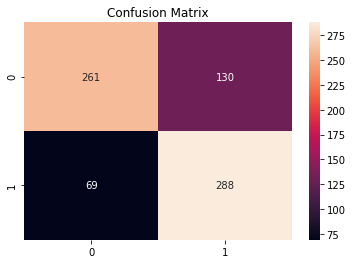

In [169]:
sns.heatmap(confusion_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()